<img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/AnaliseAirbnbToronto/main/Images/Banner.png">




*Um projeto inspirado por:*




<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*



---

# Análise dos Dados do Airbnb - Toronto / Canadá

Esta análise tem por objetivo extrair insights a partir de dados públicos disponibilizados pelo [Airbnb](https://www.airbnb.com.br/), que é considerada a **maior empresa hoteleira da atualidade**, mesmo **não possuindo nehum hotel**!

A Startup, fundada em 2008, conecta pessoas que querem viajar e se hospedar com anfitriões que querem alugar seus imóveis de maneira prática através de uma plataforma inovadora. Esse novo modelo de negócios desafia as redes hoteleiras tradicionais, tanto que, em 2018, o [Airbnb](https://www.airbnb.com.br/) já havia **hospedado mais de 300 milhões** de pessoas ao redor do mundo

Os dados aqui exibidos foram retirados do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


# Sobre a cidade

**Toronto** é a maior cidade do Canadá, com 5,5 milhões de habitantes. Fundada em 1834, a capital da provincia de Ontário, é moderna, com ruas largas e edifícios altos, mas em meio à modernidade há espaços para bairros boêmios, com prédios antigos de estilos inglês.

<img alt="Toronto" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/AnaliseAirbnbToronto/main/Images/Toronto.jpg">

Entre as diversas atrações e destinos turisticos, se destacam a **Torre CN**, o **Museu Real de Ontário**, as **Toronto Islands**, a **Galeria de Arte de Ontário** e muitos outros. Localizada às margens do lago Ontário, a cidade é ponto de encontro de culturas, negócios, artes e histórias, além de ser o centro financeiro e comercial do país. Possui um centro vibrante, onde se concentram belos museus, agradáveis cafés, lojas sofisticadas, bem como centenas de espaços verdes e parques.

**Neste *notebook* iremos analisar, de forma simples, os dados referentes à cidade e ver quais insights podem ser extraídos a partir deles.**

## Obtenção dos Dados

Os dados utilizados neste notebook foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

A intenção é realizar uma análise exploratória inicial, por isso apenas o arquivo abaixo será baixado:

* `listings.csv` - *Summary information and metrics for listings in Toronto (good for visualisations).*

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-01-02/visualisations/listings.csv")

## Análise dos Dados

Esta etapa inicial nos dará uma conciência e um entendimento de como os dados estão estruturados.

Antes de iniciar qualquer análise, vamos verificar a estrutura do nosso *dataset*, analisando as 5 primeiras entradas


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,96,180,169,2013-08-27,1.22,2,365
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,64,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.68,2,324
4,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-08-30,0.20,1,0


**Dicionário das variáveis**
* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Após realizar a importação dos dados, identificarmos as principais variáveis e seus singnificados e visualizarmos a estrutura básica do nosso *Dataset*, precisamos responder a algumas perguntas, a fim de adquirirmos um entendimento maior dos dados para, então, conseguirmos extrair os *insights* que desejamos.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nessa etapa, identificaremos a quantidade de entradas que nosso *Dataset* possui e veremos quais os tipos de dados de cada coluna.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	18265
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Vimos que o *Dataset* possui **18.265 entradas**, distribuidas em **16 variáveis** diferentes.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Precisamos verificar a quantidade de valores ausentes no dataset para sabermos se estes são significativos quando comparados ao total de entradas. 


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)


neighbourhood_group               100.000000
reviews_per_month                  22.474678
last_review                        22.474678
host_name                           0.060224
name                                0.005475
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

Esse passo é importante para analisarmos a qualidade do *Dataset*, por isso deve ser realizado logo no inicio. 
* Vemos que a coluna `neighbourhood_group` possui 100% dos seus valores ausentes e não deve ser considerada;
* As colunas `reviews_per_month` e `last_review` possuem aproximadamente 22,47% dos seus valores nulos.
*As colunas `host_name` e `name` também possuem valores nulos, aproximadamente 0,06% e 0,005% respectivamente.

### **Q3. Qual o tipo de distribuição das variáveis?** 
Verificaremos a distribuição das variáveis através do histograma.

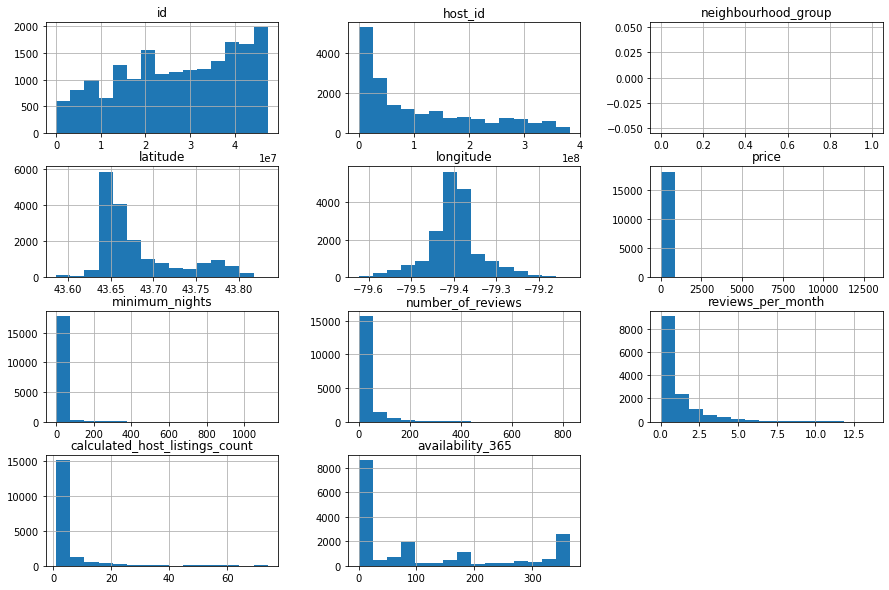

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *Outliers* presentes?**
Pela distribuição do histograma aparentemente o *Dataset* possui *outliers*, que são valores que não seguem a distribuição normal dos dados e distorcem a representação gráfica, levando a uma análise errônea e, consequentemente, a entendimentos incorretos do cenário apresentado. Iremos confirmar rapidamente de duas maneiras, são elas:


* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para as variáveis.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18265.000000,18265.000000,18265.000000,14160.000000,18265.000000,18265.000000
mean,137.659677,13.482617,26.021243,1.095512,4.718478,111.429565
std,306.423241,38.038305,53.033309,1.496456,9.629260,136.522538
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,95.000000,2.000000,5.000000,0.510000,1.000000,52.000000
75%,149.000000,20.000000,26.000000,1.380000,3.000000,180.000000
max,13000.000000,1125.000000,828.000000,13.660000,74.000000,365.000000


Pelo resumo estatítico podemos perceber claramente a presença de *Outliers*. Vejamos a coluna `Price`, por exemplo: **75%** dos valores estão entre **0 e 149**, porém o seu **maior valor é de 13.000**! Além disso seu **desvio padrão é muito alto**. 

Situações semelhantes são vistas nas colunas `calculated_host_listings_counts` e `minumum_nights`, esta possuindo **1125 como seu valor máximo**, número esse maior que os 365 dias do ano.

Vejamos agora os *boxplot*.

####Boxplot da coluna `price`####

Precisamos definir um limiar a partir do qual começaremos a considerar os valores como sendo outliers. Como **75% dos valores estão abaixo de 149**, parece ser uma estimativa conservadora que valores acima de 500 estejam fora da curva normal de distribuição.

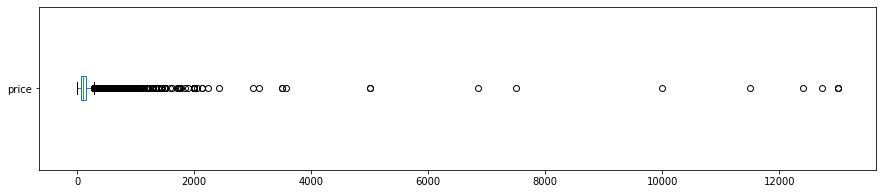


Coluna Price
Valores acima de 500: 
392 entradas
2.1462%


In [ ]:
#Boxplot da coluna price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#Quantidade de valores acima de 500 para a coluna Price
print("\nColuna Price")
print("Valores acima de 500: ")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

####Boxplot da coluna `minumum_nights`####

Aqui definiremos valores **acima de 30** como sendo outliers. Estamos levando em consideração que não é comum exigir que um imóvel seja alugado por, no mínimo, 31 dias no **Airbnb**.

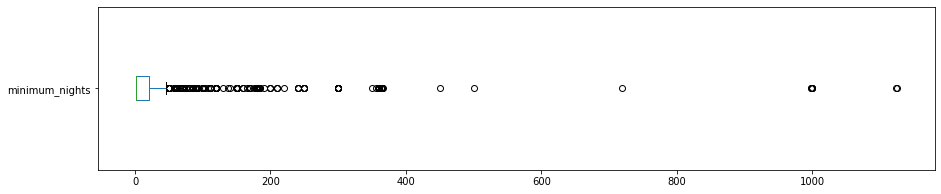


Coluna minimum_nights
Valores acima de 30: 
704 entradas
3.8544%


In [ ]:
#Boxplot da coluna minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Quantidade de valores acima de 30 dias para a coluna minimum_nights
print("\nColuna minimum_nights")
print("Valores acima de 30: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) *100))

####Histograma sem a presença de outliers

Como identificamos a presença de *Outliers* nas colunas `price`e `minimum_nights`, iremos agora limpar o *Dataframe* e plotar novamente o histograma.

Além disso também iremos excluir a coluna `neighbourhood_group`, já que está está vazia. 

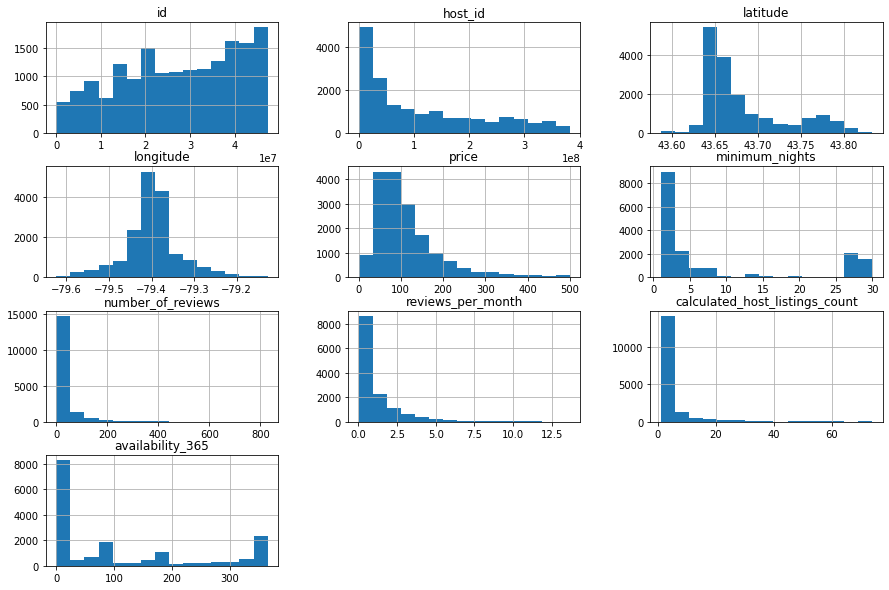

In [ ]:
#remover os outliers e criar um novo dataframe

df_limpo = df.copy()
df_limpo.drop(df_limpo[df_limpo.price > 500].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 30].index, axis=0, inplace=True)

#remover a coluna neighbourhood_group
df_limpo.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variaveis numericas do dataframe sem outliers
df_limpo.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**
Iremos agora medir a correlação existente entre as variáveis, para isso utilizaremos a **matriz de correlação** e o **mapa de calor**.
Essas ferramentas nos ajudarão a entender qual é a intensidade da correlação entre as variáveis do dataset através do *coeficiente de correlação*.

In [ ]:
# criar uma matriz de correlação
corr = df_limpo[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.044470,-0.012708,-0.014589,-0.006586,0.016442
minimum_nights,-0.044470,1.000000,0.011103,-0.030753,0.108532,0.173705
number_of_reviews,-0.012708,0.011103,1.000000,0.788485,-0.049934,0.067072
reviews_per_month,-0.014589,-0.030753,0.788485,1.000000,-0.017480,0.068253
calculated_host_listings_count,-0.006586,0.108532,-0.049934,-0.017480,1.000000,0.164866
availability_365,0.016442,0.173705,0.067072,0.068253,0.164866,1.000000


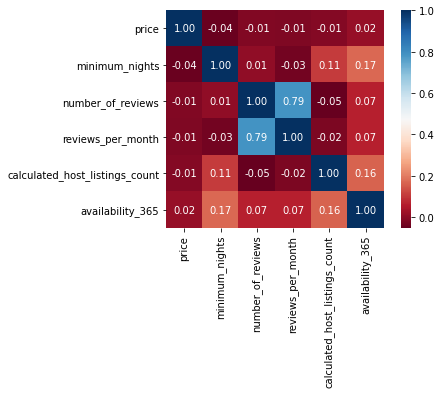

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
Aqui iremos contar a quantidade de cada tipo de acomodação disponível na cidade, utilizando o `value_counts()`. Essa informação está disponível na coluna `room_type` e indica se a opção disponível para aluguel é do tipo apartamento/casa inteira, apenas um quarto, quarto compartilhado ou quarto de hotel.

Além disso também iremos calcular a porcentagem de cada tipo de acomodação.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_limpo.room_type.value_counts()

Entire home/apt    10660
Private room        6170
Shared room          303
Hotel room            58
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_limpo.room_type.value_counts() / df_limpo.shape[0])*100

Entire home/apt    62.009191
Private room       35.890873
Shared room         1.762550
Hotel room          0.337386
Name: room_type, dtype: float64

Percebemos que a maior parte das acomodações são do tipo `Entire home/apt`, tendo um total de aproximadamente **62%** dos alugueis disponíveis. Em segundo lugar, com **35,8%**, temos as acomodações do tipo `Private room`. Em terceiro temos as acomodações `Shared room`, com **1,7%** e com apenas **0,3%** do total de alugueis disponíveis, temos as acomodações do tipo `Hotel room`.

### **Q7. Qual a localidade mais cara de Toronto?**
Aqui, iremos utilizar o `groupby()` para comparar os bairros (*neighbourhoods*) a partir do preço de locação para descobrir qual a localidade mais cara da cidade de Toronto.

In [ ]:
# ver preços por bairros, na média
df_limpo.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Waterfront Communities-The Island    149.855921
Maple Leaf                           142.705882
The Beaches                          142.223776
Casa Loma                            142.045455
Rosedale-Moore Park                  140.961538
                                        ...    
Caledonia-Fairbank                    55.803922
Rustic                                54.333333
Glenfield-Jane Heights                53.593750
Eglinton East                         53.289474
Malvern                               42.341667
Name: price, Length: 140, dtype: float64

O dataset inclui as informações de latitude e longitude, com isso podemos plotar cada ponto e visualizar onde ocorre a maior concentração de imóveis disponíveis para aluguel. Para isso, considera-se `x = longitude` e `y = latitude`.

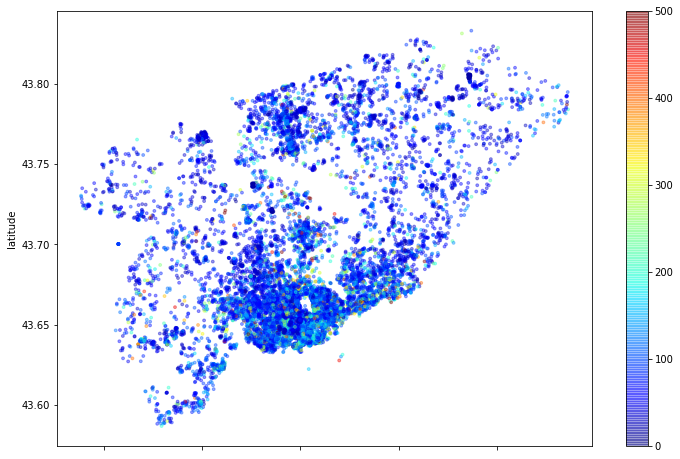

In [ ]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4,s=8, c=df_limpo['price'], cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Veremos qual é a média do mínimo de noites das acomodações disponíveis para aluguel.

In [ ]:
# ver a média da coluna `minimum_nights``
df_limpo.minimum_nights.mean()

8.465359781280902

## Conclusões


Com base nessa análise dos dados mais simples disponibilizados pelo **Airbnb** conseguimos chegar a algumas conslusões:
* A maior parte das acomodações disponíveis são do tipo Apartamento/Casa completa (`Entire home/apt`), representando aproximadamente **62%** do total;
* As acomodações mais caras estão localizadas em áreas próximas a orla da cidade, em uma região conhecida como *Old Toronto*, local com diversos pontos turisticos de interesse, entre eles as **Toronto Islands**;
* Apesar de possuir uma média de **8 noites** mínimas para aluguel, a maior parte das acomodações exige apenas **uma noite** para que possam ser alugadas.

Outros insights precisariam de uma quantidade maior de atributos a serem analisados, talvez utilizando o conjunto de dados completos, com 106 atributos disponíveis. Ainda assim, com esse *Dataset* resumido, foi possível realizar uma análise exploratória inicial bastante interessante.